In [1]:
import pandas as pd
import numpy as np

# Number of sample patients
n_patients = 500

# Mock patients table
patients = pd.DataFrame({
    'subject_id': range(1, n_patients+1),
    'gender': np.random.choice(['M', 'F'], n_patients),
    'anchor_age': np.random.randint(18, 90, n_patients),
    'anchor_year': np.random.randint(2010, 2024, n_patients)
})

# Mock admissions table
admissions = pd.DataFrame({
    'hadm_id': range(1000, 1000+n_patients),
    'subject_id': patients['subject_id'],
    'admittime': pd.to_datetime(np.random.randint(
        pd.Timestamp('2010-01-01').value, pd.Timestamp('2023-12-31').value, n_patients)
    ),
    'dischtime': pd.to_datetime(np.random.randint(
        pd.Timestamp('2010-01-02').value, pd.Timestamp('2024-01-01').value, n_patients)
    ),
    'admission_type': np.random.choice(['EMERGENCY','ELECTIVE','URGENT'], n_patients),
    'insurance': np.random.choice(['Medicare','Private','Medicaid'], n_patients)
})

# Mock ICU stays table
icustays = pd.DataFrame({
    'icustay_id': range(2000, 2000+n_patients),
    'subject_id': patients['subject_id'],
    'hadm_id': admissions['hadm_id'],
    'intime': admissions['admittime'] + pd.to_timedelta(np.random.randint(0, 3, n_patients), unit='d'),
    'outtime': admissions['admittime'] + pd.to_timedelta(np.random.randint(1, 10, n_patients), unit='d')
})
icustays['los'] = (icustays['outtime'] - icustays['intime']).dt.total_seconds() / (24*3600)


In [2]:
df = icustays.merge(admissions, on=['subject_id','hadm_id']).merge(patients, on='subject_id')
df['in_hospital_death'] = np.random.choice([0,1], size=n_patients, p=[0.9,0.1])
df['admit_month'] = df['admittime'].dt.to_period('M').astype(str)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


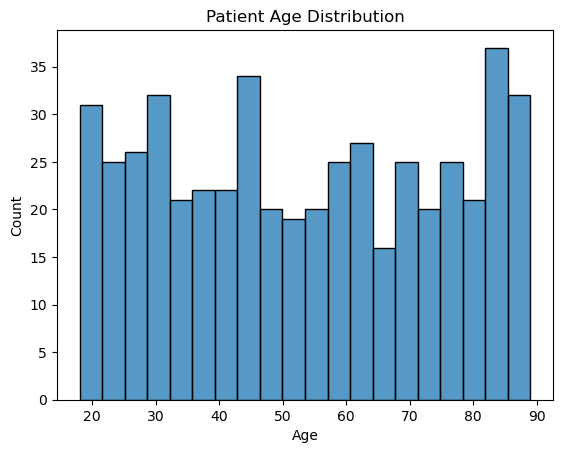

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['anchor_age'], bins=20)
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


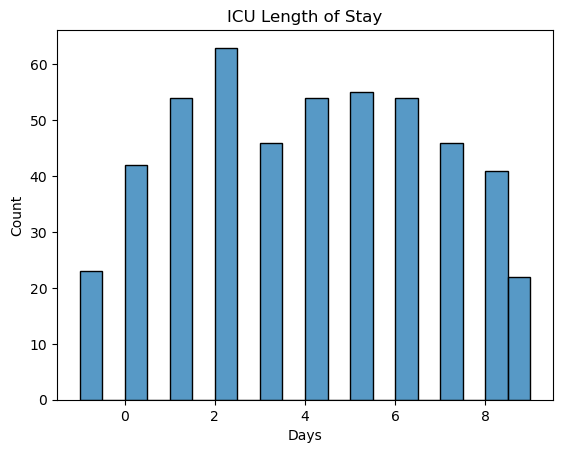

In [4]:
sns.histplot(df['los'], bins=20)
plt.title("ICU Length of Stay")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

In [5]:
mortality_rate = df['in_hospital_death'].mean()
print(f"Simulated in-hospital mortality: {mortality_rate:.2%}")

Simulated in-hospital mortality: 9.60%


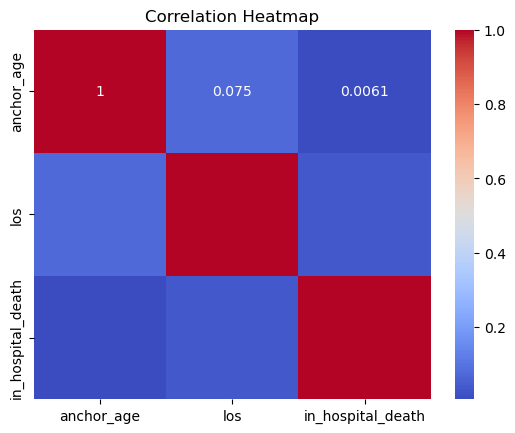

In [6]:
numeric_cols = ['anchor_age','los','in_hospital_death']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


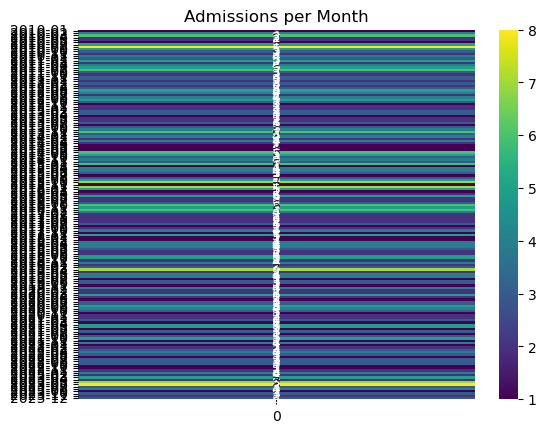

In [7]:
admit_counts = df.groupby('admit_month').size()
sns.heatmap(admit_counts.values.reshape(-1,1), annot=True, cmap='viridis', yticklabels=admit_counts.index)
plt.title("Admissions per Month")
plt.show()


In [8]:
# plotting defaults
plt.rcParams.update({'figure.figsize': (10,6), 'font.size': 12})
sns.set(style='whitegrid')


In [9]:
# Cell 2 — generate mock patients
n_patients = 500

patients = pd.DataFrame({
    'subject_id': range(1, n_patients+1),
    'gender': np.random.choice(['M', 'F'], n_patients),
    'anchor_age': np.random.randint(18, 90, n_patients),
    'anchor_year': np.random.randint(2010, 2024, n_patients)
})


In [10]:
# Cell 3 — mock admissions
admissions = pd.DataFrame({
    'hadm_id': range(1000, 1000+n_patients),
    'subject_id': patients['subject_id'],
    'admittime': pd.to_datetime(np.random.randint(
        pd.Timestamp('2010-01-01').value, pd.Timestamp('2023-12-31').value, n_patients)
    ),
    'dischtime': pd.to_datetime(np.random.randint(
        pd.Timestamp('2010-01-02').value, pd.Timestamp('2024-01-01').value, n_patients)
    ),
    'admission_type': np.random.choice(['EMERGENCY','ELECTIVE','URGENT'], n_patients),
    'insurance': np.random.choice(['Medicare','Private','Medicaid'], n_patients)
})


In [11]:
# Cell 4 — mock ICU stays
icustays = pd.DataFrame({
    'icustay_id': range(2000, 2000+n_patients),
    'subject_id': patients['subject_id'],
    'hadm_id': admissions['hadm_id'],
    'intime': admissions['admittime'] + pd.to_timedelta(np.random.randint(0, 3, n_patients), unit='d'),
    'outtime': admissions['admittime'] + pd.to_timedelta(np.random.randint(1, 10, n_patients), unit='d')
})
icustays['los'] = (icustays['outtime'] - icustays['intime']).dt.total_seconds() / (24*3600)


In [12]:
# Cell 5 — merge tables and add derived features
df = icustays.merge(admissions, on=['subject_id','hadm_id']).merge(patients, on='subject_id')
df['in_hospital_death'] = np.random.choice([0,1], size=n_patients, p=[0.9,0.1])
df['admit_month'] = df['admittime'].dt.to_period('M').astype(str)
df.head()


,icustay_id,subject_id,hadm_id,intime,outtime,los,admittime,dischtime,admission_type,insurance,gender,anchor_age,anchor_year,in_hospital_death,admit_month
0,2000,1,1000,2022-07-25 23:00:32.839528127,2022-07-26 23:00:32.839528127,1.0,2022-07-23 23:00:32.839528127,2010-12-14 12:03:06.446743872,ELECTIVE,Medicaid,F,40,2020,0,2022-07
1,2001,2,1001,2013-02-27 02:20:41.818323105,2013-03-03 02:20:41.818323105,4.0,2013-02-26 02:20:41.818323105,2019-09-17 03:43:30.532318692,EMERGENCY,Private,M,81,2023,0,2013-02
2,2002,3,1002,2011-07-07 15:17:42.365105485,2011-07-16 15:17:42.365105485,9.0,2011-07-07 15:17:42.365105485,2020-05-03 09:32:23.321479184,URGENT,Medicaid,F,23,2022,0,2011-07
3,2003,4,1003,2019-06-10 11:44:33.859434114,2019-06-16 11:44:33.859434114,6.0,2019-06-09 11:44:33.859434114,2023-08-06 13:50:14.745925183,ELECTIVE,Medicare,F,68,2020,0,2019-06
4,2004,5,1004,2013-08-03 11:55:29.756125912,2013-08-08 11:55:29.756125912,5.0,2013-08-02 11:55:29.756125912,2017-01-10 00:47:36.807148125,EMERGENCY,Medicare,F,24,2012,0,2013-08


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


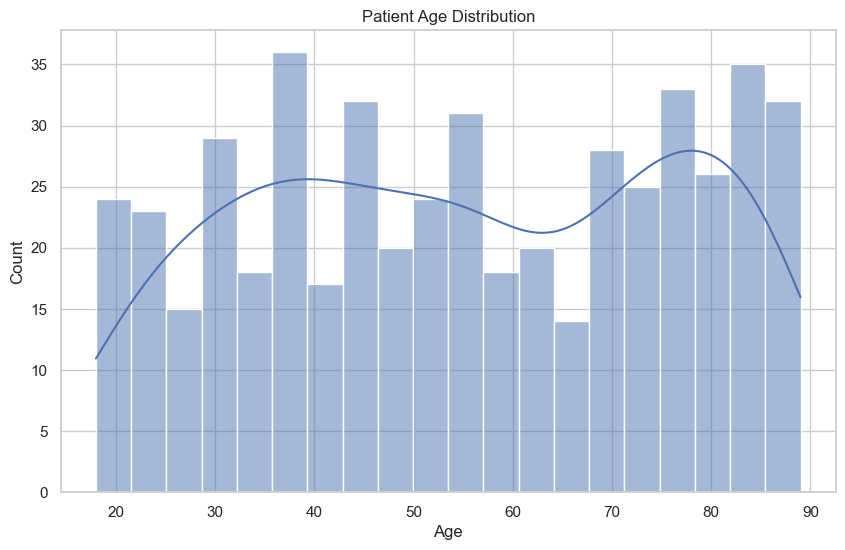

In [13]:
# Cell 6 — Age distribution
sns.histplot(df['anchor_age'], bins=20, kde=True)
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


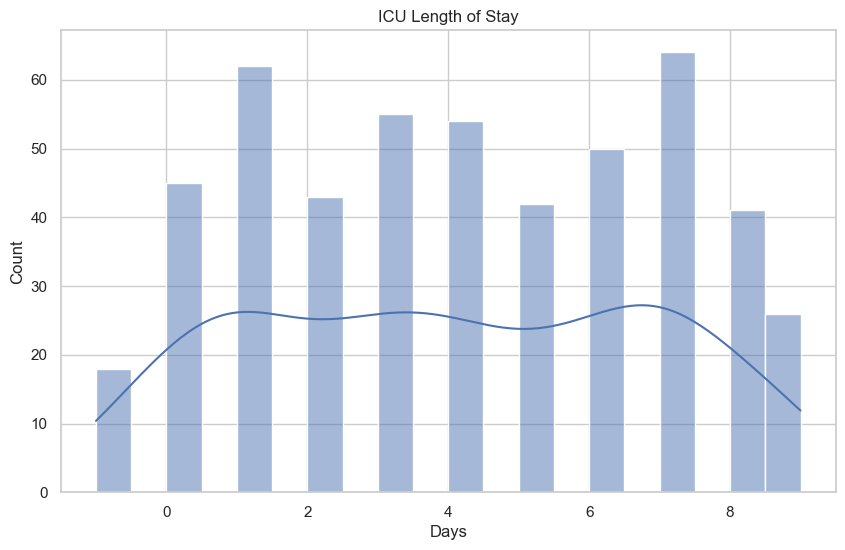

In [14]:
# Cell 7 — ICU Length of Stay distribution
sns.histplot(df['los'], bins=20, kde=True)
plt.title("ICU Length of Stay")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


Simulated in-hospital mortality: 13.40%


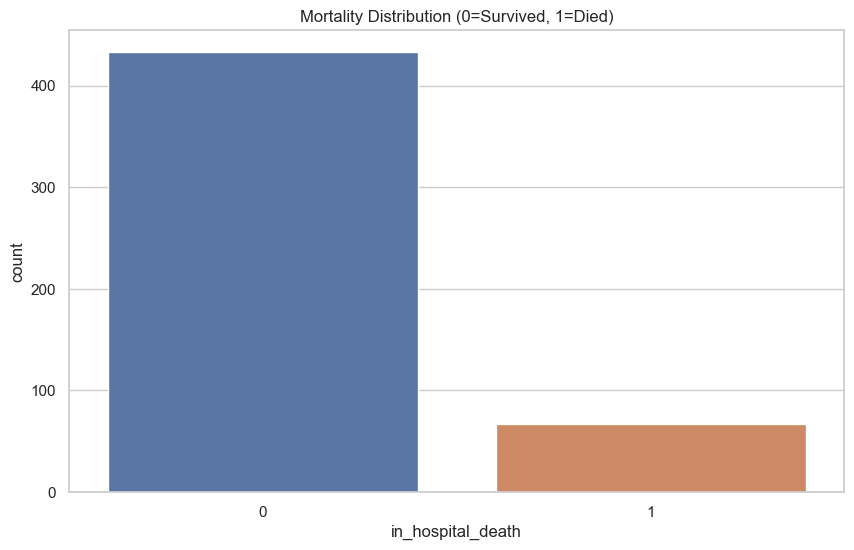

In [15]:
# Cell 8 — Mortality analysis
mortality_rate = df['in_hospital_death'].mean()
print(f"Simulated in-hospital mortality: {mortality_rate:.2%}")

sns.countplot(x='in_hospital_death', data=df)
plt.title("Mortality Distribution (0=Survived, 1=Died)")
plt.show()


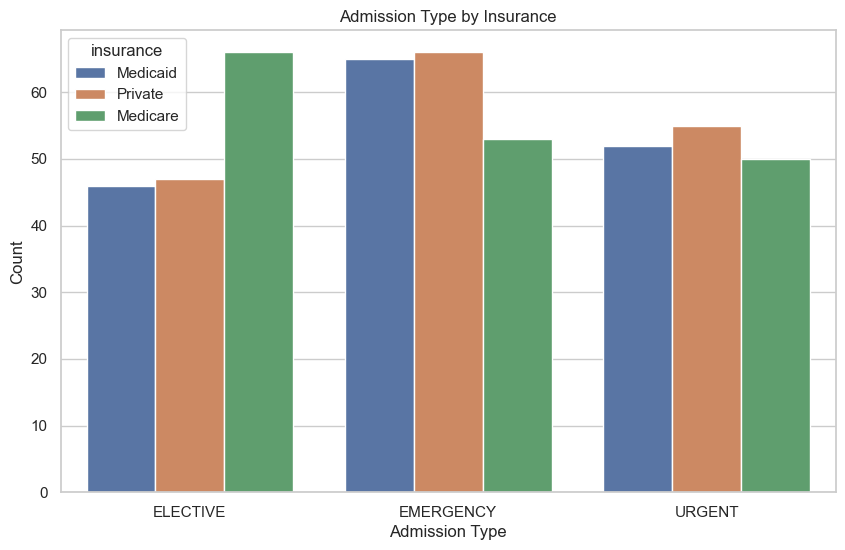

In [16]:
# Cell 9 — Admission type by insurance
sns.countplot(x='admission_type', hue='insurance', data=df)
plt.title("Admission Type by Insurance")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()


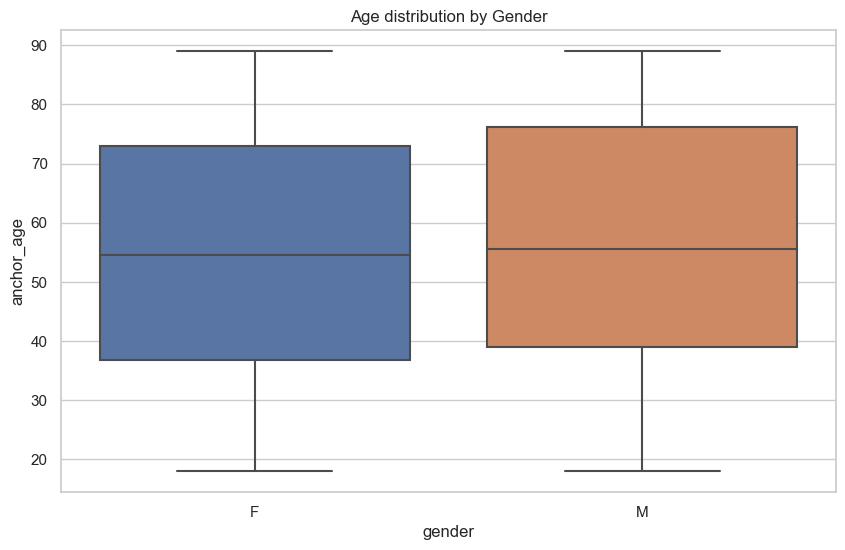

In [17]:
# Cell 10 — Gender vs Age boxplot
sns.boxplot(x='gender', y='anchor_age', data=df)
plt.title("Age distribution by Gender")
plt.show()


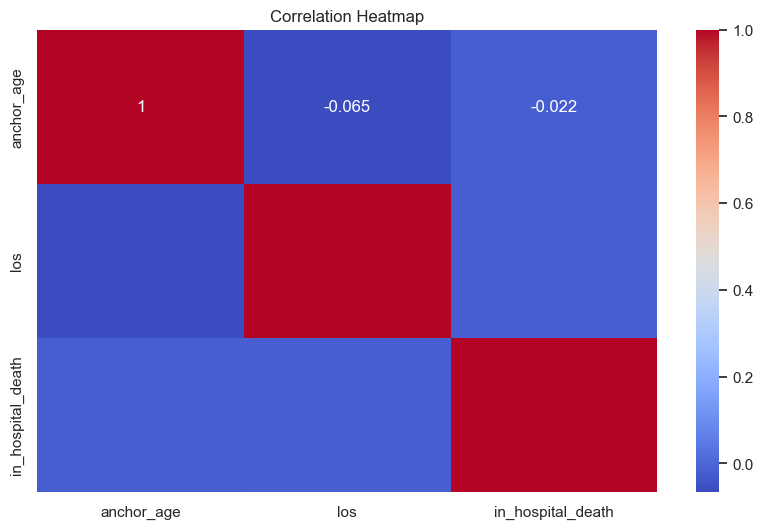

In [18]:
# Cell 11 — Correlation heatmap
numeric_cols = ['anchor_age','los','in_hospital_death']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


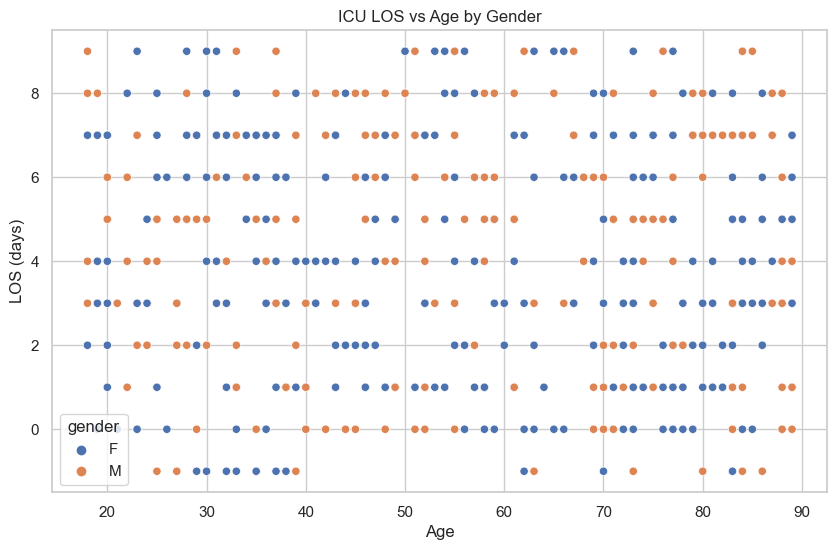

In [19]:
# Cell 12 — LOS vs Age scatter
sns.scatterplot(x='anchor_age', y='los', hue='gender', data=df)
plt.title("ICU LOS vs Age by Gender")
plt.xlabel("Age")
plt.ylabel("LOS (days)")
plt.show()



In [20]:
# Cell 13 — Heatmap of vitals (first ICU stay)
icu0 = vitals[vitals['icustay_id']==df['icustay_id'].iloc[0]].set_index('time_hr')
sns.heatmap(icu0[['heart_rate','resp_rate','temperature']].T, cmap='magma', annot=True)
plt.title(f"Vitals Heatmap for icustay_id {df['icustay_id'].iloc[0]}")
plt.xlabel("Time (hr)")
plt.ylabel("Measurement")
plt.show()


NameError: name 'vitals' is not defined

In [21]:
# Cell 13 — Generate synthetic vitals for ICU stays
vitals = pd.DataFrame({
    'icustay_id': np.repeat(df['icustay_id'].values, 10),
    'time_hr': np.tile(np.arange(0,10), n_patients),
    'heart_rate': np.random.randint(60,120, n_patients*10),
    'resp_rate': np.random.randint(12,30, n_patients*10),
    'temperature': np.random.normal(37,0.8, n_patients*10)
})


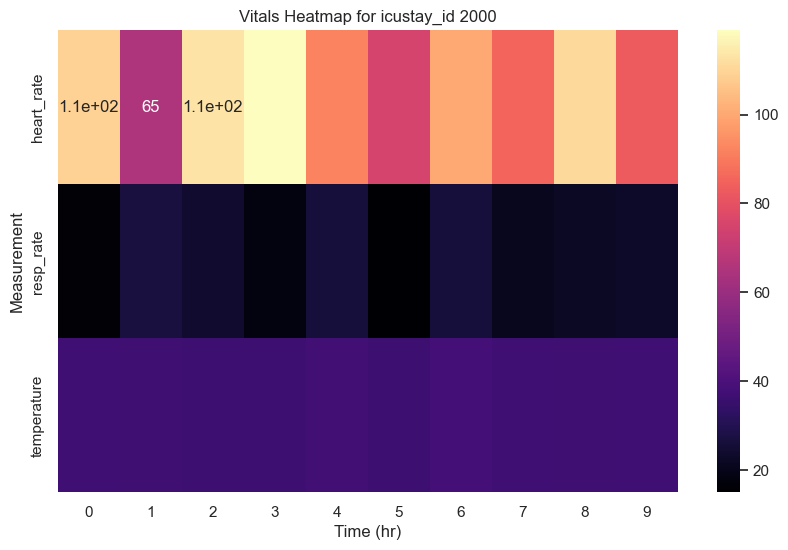

In [22]:
# Cell 14 — Heatmap of vitals (first ICU stay)
icu0 = vitals[vitals['icustay_id']==df['icustay_id'].iloc[0]].set_index('time_hr')
sns.heatmap(icu0[['heart_rate','resp_rate','temperature']].T, cmap='magma', annot=True)
plt.title(f"Vitals Heatmap for icustay_id {df['icustay_id'].iloc[0]}")
plt.xlabel("Time (hr)")
plt.ylabel("Measurement")
plt.show()